In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-dataset-3000-records/dogs_dataset.csv


In [2]:
import pandas as pd

In [3]:
dogie=pd.read_csv('/kaggle/input/dogs-dataset-3000-records/dogs_dataset.csv')

In [4]:
dogie.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


In [5]:
dogie.tail()


,Breed,Age (Years),Weight (kg),Color,Gender
2995,Siberian Husky,5,25,Tan,Female
2996,Vizsla,11,34,Blue,Female
2997,Pekingese,4,49,Bicolor,Male
2998,Samoyed,13,7,Blue,Female
2999,Pembroke Welsh Corgi,7,19,White,Female


In [6]:
dogie.columns

Index(['Breed', 'Age (Years)', 'Weight (kg)', 'Color', 'Gender'], dtype='object')

In [7]:
dogie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        3000 non-null   object
 1   Age (Years)  3000 non-null   int64 
 2   Weight (kg)  3000 non-null   int64 
 3   Color        3000 non-null   object
 4   Gender       3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


# Remove any leading/trailing spaces from column names

In [8]:
# Remove any leading/trailing spaces from column names
dogie.columns = dogie.columns.str.strip()

#  Remove duplicates, handle missing values, and ensure consistency in breed names

In [9]:
dogie.drop_duplicates(inplace=True)
dogie.fillna(0,inplace=True)

In [10]:
# Count occurrences of each breed
breed_counts = dogie['Breed'].value_counts().reset_index()


In [11]:
breed_counts.columns = ['Breed', 'Popularity']


In [12]:
breed_counts.head()

,Breed,Popularity
0,Rottweiler,118
1,French Bulldog,70
2,Pekingese,68
3,Pembroke Welsh Corgi,67
4,Doberman Pinscher,66


In [13]:
breed_counts.tail()

,Breed,Popularity
48,Pomeranian,48
49,Schnauzer,45
50,Shiba Inu,45
51,Belgian Malinois,44
52,Golden Retriever,43


# bar chart to visualize the popularity of each breed

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

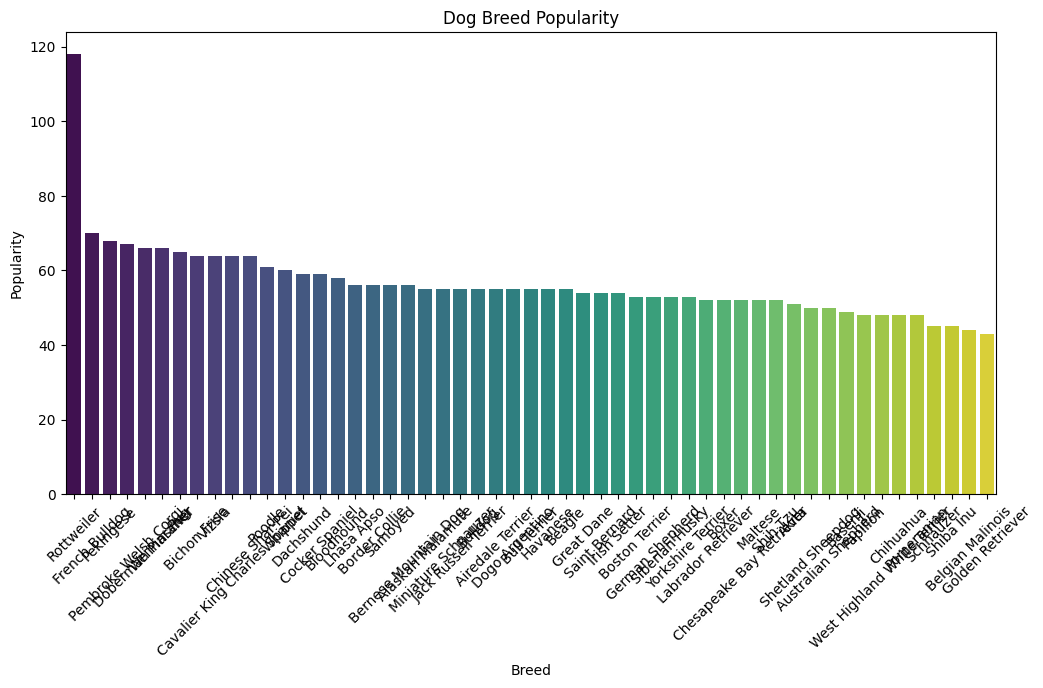

In [15]:
#bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Breed', y='Popularity', data=breed_counts, palette='viridis')
plt.title('Dog Breed Popularity')
plt.xlabel('Breed')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

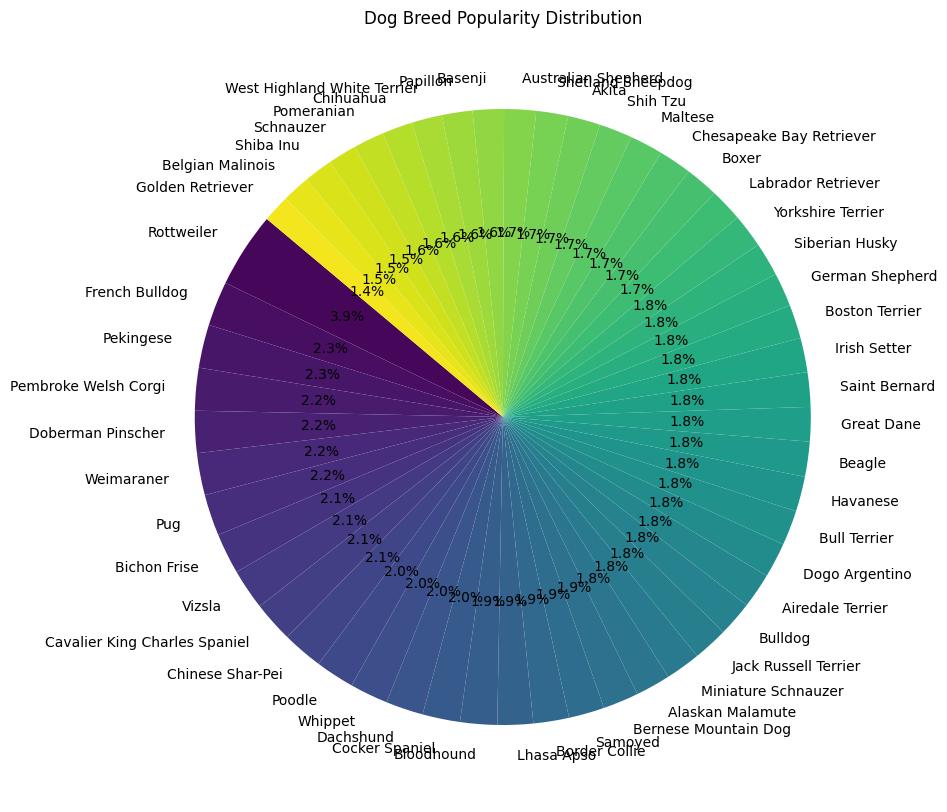

In [16]:
#pie chart
plt.figure(figsize=(10, 10))
plt.pie(breed_counts['Popularity'], labels=breed_counts['Breed'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(breed_counts)))
plt.title('Dog Breed Popularity Distribution')
plt.show()